<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carlos Daniel Pérez Hernández y Pablo Alejandro Rivera Sánchez

**Fecha:** 8 de marzo de 2021.

**Expediente** : if722627 y if721005
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 5

Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.

### Ejercicio 1:
Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

#### Respuesta Pablo

Despeje de U:

$$\frac{2}{\pi}\sin^{-1}(\sqrt x) = U$$

$$\sin^{-1}(\sqrt x) = \frac{\pi}{2}U$$

$$\sqrt x = \sin({\frac{\pi}{2}U})$$

$$x = \sin^{2}({\frac{\pi}{2}U})$$

Derivada de $F(x)$

$$\frac{dF(x)}{dx} = \frac{2}{\pi} \frac{d}{dx} \sin^{-1}(\sqrt{x})$$

$$ = \frac{2}{\pi} \frac{1}{\sqrt{1 - (\sqrt{x})^2}} \frac{d}{dx} \sqrt{x} $$

$$ = \frac{2}{\pi} \frac{1}{\sqrt{1 - (\sqrt{x})^2}} \frac{1}{2 \sqrt{x}} $$

$$ = \frac{1}{\pi \sqrt{1 - (\sqrt{x})^2}} \frac{1}{\sqrt{x}} $$

$$ = \frac{1}{\pi \sqrt{x} \sqrt{1 - {x}} } $$

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st 
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-2-079dc7ab886e>:12: RuntimeWarning: divide by zero encountered in true_divide
  y = 1 / (np.pi * (x ** (1/2)) * np.sqrt(1 - x))


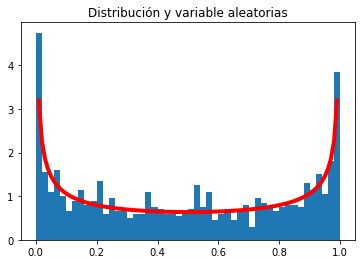

In [2]:
def dist_br(N):
    # Variable aleatorias de la distribución
    x_distr = np.zeros(N)
    def distr_brown(i):
        nonlocal x_distr
        x_distr[i] = np.sin((np.pi / 2) * np.random.random()) ** 2
        
    [distr_brown(i) for i in range(N)]
    
    x = np.arange(0,1,0.01)
    # Derivada
    y = 1 / (np.pi * (x ** (1/2)) * np.sqrt(1 - x))
    
    plt.hist(x_distr, bins = 50, density = True)
    plt.plot(x, y, linewidth = 4, color = 'red')
    plt.title('Distribución y variable aleatorias')
    plt.show()
    
dist_br(1000)

Creamos una función que nos va a generar variables aleatorias de la distribución dada y va también a revisar que se estén generando de manera correcta graficando la distribución de probabilidad $f(x)$, si los cálculos fueron correctos, el histograma de las variable aleatorias debe estar acotado por la distribución de probabilidad $f(x)$. En este caso vemos que así sucede. Despejamos $F(x)$ e igualamos a U para despejar $x$, la cual, como se ve en la función, nos genera variable aleatorias con la distribución en un vector de ceros a través de una función anidada, solamente escribimos la fórmula que obtuvimos con los cálculos. Posteriormente, graficamos la función obtenida de la distribución de probabilidad $f(x)$ (fórmula) para comparar con el histograma de las $x$ generadas. 

### Ejercicio 2:
Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

#### Respuesta Pablo

In [3]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

In [4]:
def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) #len(set) cuantos valores diferentes hay en distribución
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()

In [5]:
def p_acum_dist_binom(n, p):
    p_acum = np.zeros(n)
    p_acum[0] = (1 - p)**n
    def pb(i):
        nonlocal p_acum
        c  = p / (1 - p)
        p_acum[i + 1] = (c * (n - i) / (i + 1)) * p_acum[i]
        
    [pb(i) for i in range(n - 1)]
    
    return np.cumsum(p_acum)

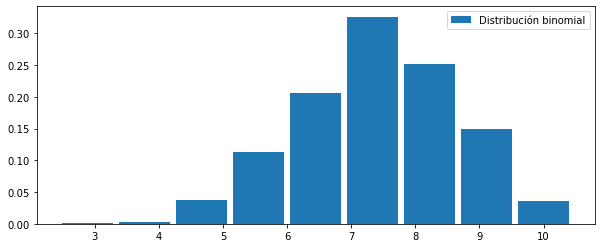

In [6]:
p_acum_db = p_acum_dist_binom(10, 0.7)
dist_binom = Gen_distr_discreta(p_acum_db, np.arange(0, 10 + 1), 1000)
plot_histogram_discrete(dist_binom, 'Distribución binomial')

Tomamos las funciones creadas y vistas en clase acerca de la creación de distribuciones discretas al igual que el histograma de las mismas. Para poder utilizar estas funciones necesitamos obtener la distribución de probabilidad acumulada de la distribución binomial con los parámetros dados, con esta, podemos crear la distribución de las variables discretas. Esto lo hacemos mediante la función creada la cual asigna los valores aleatorios generados (U) a un respectivo valor en la distribución de probabilidad acumulada, creando la distribución de probabilidad.

**Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

### LINK REPOSITORIO
[Link repositorio Github](https://github.com/danielperhez/Tarea5_PRivera_CPerez)